# Lab 10
**Upload two files** to Gradescope: 
* `Lab10.ipynb` (run all cells to make sure that outputs are visible, especially images) 
* `Lab10.py` (which will be autograded)

**IMPORTANT**: You may import other images but you will need to comment out the references before uploading to the Gradescope autograder.

___

In [58]:
import numpy as np
from PIL import Image


### `Image` Module
For image processing. Read in the file `buffalo.png`.

<img src="http://www.coloradomath.org/python/buffalo.jpg" width="195" height="144" style="display:block; margin:auto" />


In [2]:
buff_img = Image.open('buffalo.png')

In Jupyter, entering an image name in a cell will display it. To show an image from within a function, call `display(...)`.

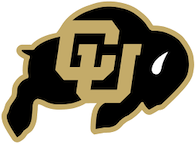

In [3]:
buff_img

Check the data type of the image.

In [4]:
type(buff_img)

PIL.PngImagePlugin.PngImageFile

Three of the attributes of the image are `.format`, `.mode`, and `.size`. What do they store?

Optional: Other attributes can be viewed by calling `vars(...)`.

In [6]:
buff_img.format, buff_img.mode, buff_img.size
#vars(buff_img)

('PNG', 'RGBA', (195, 144))

### RGB and RGBA Color Models

RGB is a 3-channel color model with each color represented by a `(R, G, B)` tuple corresponding to the red, green, and blue light components, respectively, of additive color. Each `R`, `G`, and `B` value is a number from 0 to 255, which can be stored as an unsigned 8-bit integer.

RGBA is a 4-channel color model with each color represented by a `(R, G, B, A)` tuple. A fourth alpha channel specifies the transparency of an image.

There are other color models. For this course, we will be focusing on the RGB model. 

### Basic Colors
Visit the site https://rgbacolorpicker.com to read more about color models. Determine the RGB values for the following colors: 
* red (with no blue or green)
* green
* blue
* white
* black. 

Store the values as `(R, G, B)` tuples below.

In [11]:
red_color = (255,0,0) 
green_color = (0,255,0)
blue_color = (0,0,255)
white_color = (255,255,255)
black_color = (0,0,0)

### Convert from RGBA to RGB
The buffalo image has been stored using 4 channels. Verify by calling `.getbands()`.

In [7]:
buff_img.getbands()

('R', 'G', 'B', 'A')

Convert the buffalo image to RGB mode by calling `.convert('RGB')`, then replace the original image with the new one.

In [9]:
buff_img = buff_img.convert('RGB')

### Converting Images to and from Array Format
Converting images to numpy array will allow us to understand the color models in more detail and will let us modify images.

**Important**: When modifying images, **use numpy vectorization** as much as possible. Avoid writing loops.

In [10]:
buff_arr = np.array(buff_img)

Examine the upper 3x3 corner of the array.

In [12]:
buff_arr[0,0, :]

array([255, 255, 255], dtype=uint8)

You should see that the square is all white and the data type of the array is `uint8` which corresponds to an unsigned 8-bit integer.

Let's examine a 3x3 square in the middle of the image.

In [13]:
buff_arr[72:75, 72:75, :]

array([[[196, 171, 105],
        [196, 171, 105],
        [196, 171, 105]],

       [[196, 171, 105],
        [196, 171, 105],
        [196, 171, 105]],

       [[196, 171, 105],
        [196, 171, 105],
        [196, 171, 105]]], dtype=uint8)

What color appears? Check by visiting the color picker site and enter the `(R, G, B)` tuple below.

In [16]:
buff_color = (196,171,105)

To convert from array to image format, call `Image.fromarray(...)`.

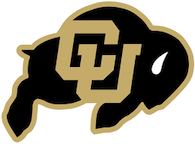

In [14]:
Image.fromarray(buff_arr)

### Saving an Image
Call `.save(filename)`. Try saving the buffalo image as a `jpg` file.

In [15]:
Image.fromarray(buff_arr).save('buff.jpg')

### Creating Color Images
Create a 20x20x3 array of `dtype='uint8'` containing only the pure red color. Display the result as an image.

In [44]:
red_arr = np.array(([255,0,0]*20**2), ndmin=3, dtype='uint8').reshape(20,20,3)
Image.fromarray(red_arr)

Now do the same using `buff_color` instead of red.

In [47]:
gold_arr = np.array(list(buff_color) * 20**2, ndmin= 3, dtype= 'uint8').reshape(20,20,3)
Image.fromarray(gold_arr)

Create red, green, and blue 20x20 blocks and display them in a horizontal row.

<img src="http://www.coloradomath.org/python/rgb_blocks.jpg" width="60" height="20" style="display:block; margin:auto" />


In [129]:
red_sqr = Image.fromarray(red_arr)
sqrs_r = np.array([255,0,0]*20**2, ndmin=3, dtype='uint8').reshape(20,20,3)
sqrs_g = np.array([0,255,0]*20**2, ndmin=3, dtype='uint8').reshape(20,20,3)
sqrs_b= np.array([0,0,255]*20**2, ndmin=3, dtype='uint8').reshape(20,20,3)

sqrs = np.concatenate((sqrs_r, sqrs_g, sqrs_b), axis=1)
Image.fromarray(sqrs)

Copy the original buffalo image. Create a new buffalo image with a blue horizontal stripe, 10 pixels high, across the middle. Display the result.

<img src="http://www.coloradomath.org/python/buffalo_stripe.jpg" width="195" height="144" style="display:block; margin:auto" />


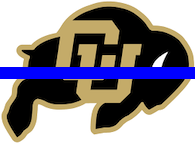

In [77]:
im_copy_arr = np.array(buff_img)

144/2
im_copy_arr[67:79, :,:] = [0,0,255]
Image.fromarray(im_copy_arr)

### Replacing Colors
Copy the original buffalo image. Create a new image, inverting all colors in the buffalo image by replacing each `val` with `255-val`. Display the result.

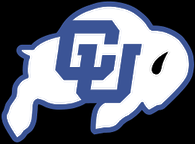

In [78]:
inv_arr = np.array(buff_img)
inv_arr = 255 - inv_arr

Image.fromarray(inv_arr)

Copy the original buffalo image. Create a new image, replacing all color values between 100 and 110 with the value 255. Display the result.

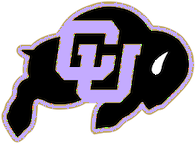

In [130]:
replace_arr = np.array(buff_img)
replace_arr[(replace_arr > 100) & (replace_arr <110)] = 255
Image.fromarray(replace_arr)

### Framing the Buffalo Image
Create a new buffalo image, expanding the original canvas by 20 pixels on all sizes, and placing a 10-px wide frame around the border.

<img src="http://www.coloradomath.org/python/buffalo_framed.jpg" width="255" height="204" style="display:block; margin:auto" />


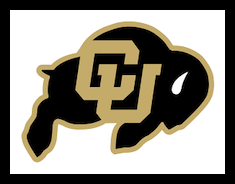

In [131]:
framed_arr = np.array(buff_img)
larger_arr = np.array([255]*184*235*3, dtype = 'uint8').reshape(184,235,3)
larger_arr[20:164, 20:215,:] = framed_arr
larger_arr[0:,0:10,:] = 0
larger_arr[0:10,0:, :] = 0
larger_arr[-10:,:, :] = 0
larger_arr[:, -10:, :] =0
Image.fromarray(larger_arr)

### Transposing and Rotating Images
The `.transpose()` method can alter the view of an image in different ways.

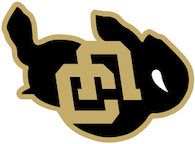

In [118]:
buff_img.transpose(Image.FLIP_TOP_BOTTOM)

There are other `transpose` options such as `FLIP_LEFT_RIGHT` and `ROTATE_90`.

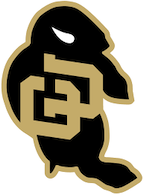

In [120]:
buff_img.transpose(Image.FLIP_LEFT_RIGHT)
buff_img.transpose(Image.ROTATE_90)

### Rotating Images
A more general way to rotate images is to call `.rotate()`, specifying the number of degrees.

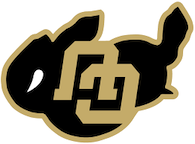

In [121]:
buff_img.rotate(180)

Include the options `expand=True` and `fillcolor='white'`.

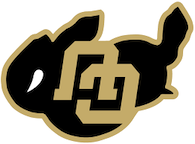

In [122]:
buff_img.rotate(180, expand=True, fillcolor='white')

### Image Documentation
Additional Image features are described here: https://omz-software.com/pythonista/docs/ios/Image.html